## <center> Extracting Features with CNN </center>

---


---


---


---

In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as im
#next line is for right image dimension ordering when using Theano backend
#otherwise it behaves as if tensorflow backend is used, switching places of tensor's dimensions
from keras import backend as K
K.set_image_dim_ordering('th')

C:\Users\Nargiz.Bakhshaliyeva\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
width, height = 150, 150
batch_size = 17
train_dir = 'C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/train/'
validation_dir ='C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/validation'

In [3]:
#rescaling pixels down to [0, 1] intervals
data_generator = ImageDataGenerator(rescale=1./255)

#preparing and loading train/test sets of data
train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(width, height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = data_generator.flow_from_directory(
        validation_dir,
        target_size=(width, height),
        batch_size=batch_size,
        class_mode='binary')

Found 2040 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [4]:
#class labelling
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [5]:
#building a simple Net
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(3,width,height)))
model.add(Activation('relu'))
conv0 = MaxPooling2D(pool_size=(2, 2))
model.add(conv0)

model.add(Convolution2D(32, (3, 3)))
conv1 = Activation('relu')
model.add(conv1)
conv2 = MaxPooling2D(pool_size=(2, 2))
model.add(conv2)

model.add(Convolution2D(64, (3, 3)))
conv3 = Activation('relu')
model.add(conv3)

conv4 = MaxPooling2D(pool_size=(2, 2))
model.add(conv4)


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
epochs = 15
train_size = 2040
validation_size = 408

In [8]:
model.fit_generator(
        train_generator,
        steps_per_epoch = train_size/batch_size,
        nb_epoch=epochs,
        validation_data=validation_generator,
        validation_steps=validation_size/batch_size)

C:\Users\Nargiz.Bakhshaliyeva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\Nargiz.Bakhshaliyeva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=120.0, validation_data=<keras.pre..., validation_steps=24.0, epochs=15)`
  


Epoch 1/15
120/120 [==============================] - 128s 1s/step - loss: 0.7049 - acc: 0.5304 - val_loss: 0.6840 - val_acc: 0.5368
Epoch 2/15
120/120 [==============================] - 133s 1s/step - loss: 0.6647 - acc: 0.5897 - val_loss: 0.6990 - val_acc: 0.5270
Epoch 3/15
120/120 [==============================] - 127s 1s/step - loss: 0.6361 - acc: 0.6426 - val_loss: 0.6348 - val_acc: 0.6471
Epoch 4/15
120/120 [==============================] - 121s 1s/step - loss: 0.5815 - acc: 0.7074 - val_loss: 0.6282 - val_acc: 0.6544
Epoch 5/15
120/120 [==============================] - 122s 1s/step - loss: 0.5447 - acc: 0.7328 - val_loss: 0.6311 - val_acc: 0.6667
Epoch 6/15
120/120 [==============================] - 134s 1s/step - loss: 0.5059 - acc: 0.7500 - val_loss: 0.7005 - val_acc: 0.6495
Epoch 7/15
120/120 [==============================] - 141s 1s/step - loss: 0.4542 - acc: 0.7799 - val_loss: 0.6041 - val_acc: 0.7157
Epoch 8/15
120/120 [==============================] - 139s 1s/step - 

In [13]:
model.save_weights('C:/Users/Nargiz.Bakhshaliyeva/Desktop/models/simple_model.h5')

##### testing the network with 3  input images

In [10]:
import theano
import matplotlib.pyplot as plt
from lasagne.utils import floatX
import skimage
import numpy as np

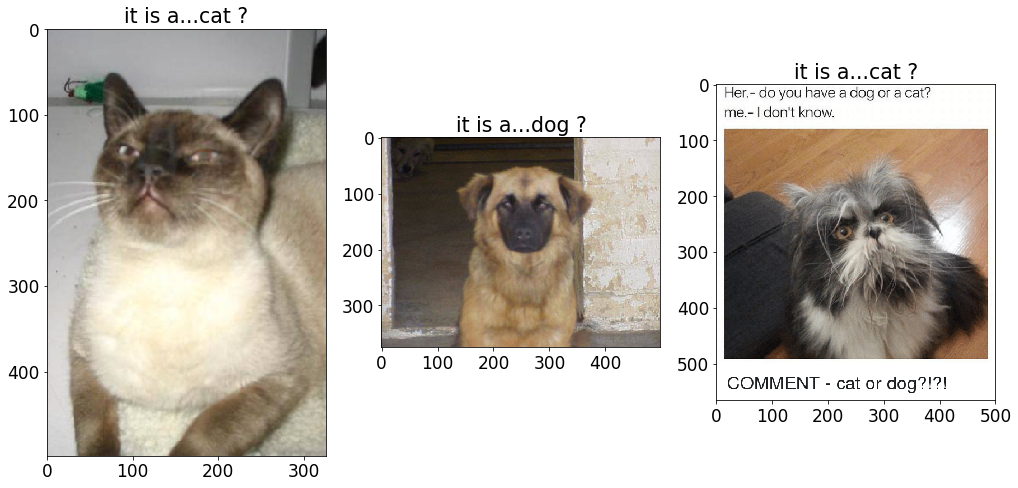

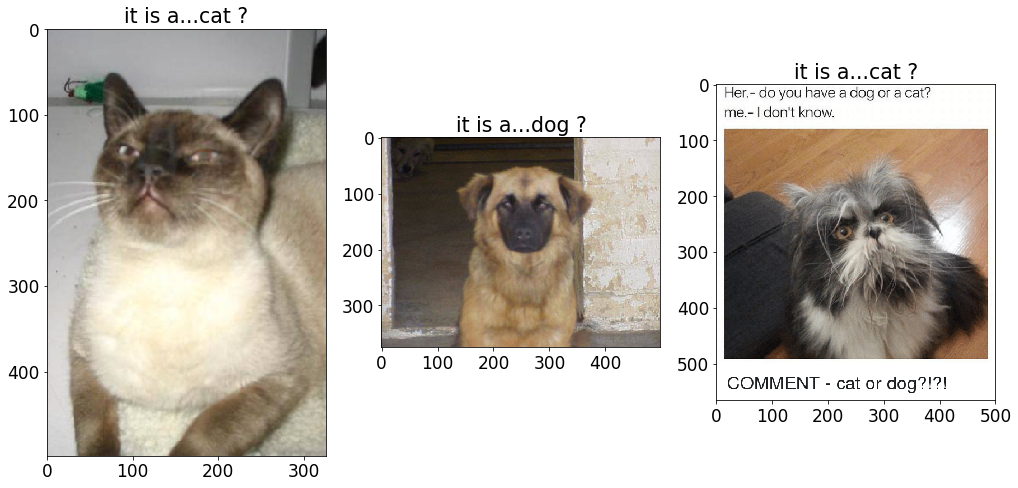

In [27]:
test_img1 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/1.jpg')
test_img2 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/2.jpg')
test_img3 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/3.png')
test_img4 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/4.jpg')
test_img5 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/5.jpg')
test_img6 = plt.imread('C:/Users/Nargiz.Bakhshaliyeva/Desktop/IS_SEM/6.jpg')

inputs = [test_img1, test_img2, test_img3,test_img4, test_img5, test_img6]
test_input = [test_img1, test_img2, test_img3,test_img4, test_img5, test_img6]
predictions = {}
labels = {}

for x in range(len(test_input)):
    test_input[x] = cv2.resize(test_input[x], (150, 150))
    test_input[x] = im.img_to_array(test_input[x])
    test_input[x] = np.expand_dims(test_input[x], axis = 0)
    predictions[x] = model.predict_classes(test_input[x])
    if predictions[x] == 0:
        labels[x] = 'cat'
    else:
        labels[x] = 'dog'

        
        
plt.show()       

figure, ax = plt.subplots(1,3, sharex = 'col', figsize=(17,17))
plt.rc('font', size=17)
ax[0].imshow(test_img1)
ax[0].set_title('it is a...%s ?' % labels[0])
ax[1].imshow(test_img2)
ax[1].set_title('it is a...%s ?' % labels[1])
ax[2].imshow(test_img3)
ax[2].set_title('it is a...%s ?' % labels[2])
#ax[3].imshow(test_img4)
#ax[3].set_title('it is a...%s ?' % labels[3])
#ax[4].imshow(test_img5)
#ax[4].set_title('it is a...%s ?' % labels[4])
#ax[5].imshow(test_img6)
#ax[5].set_title('it is a...%s ?' % labels[5])
#plt.show()
plt.show() 

##### How the features are learned with CNN :

In [18]:
#converting an image into a 4d Tensor
prepared_img = prepare_tensor(test_img2)

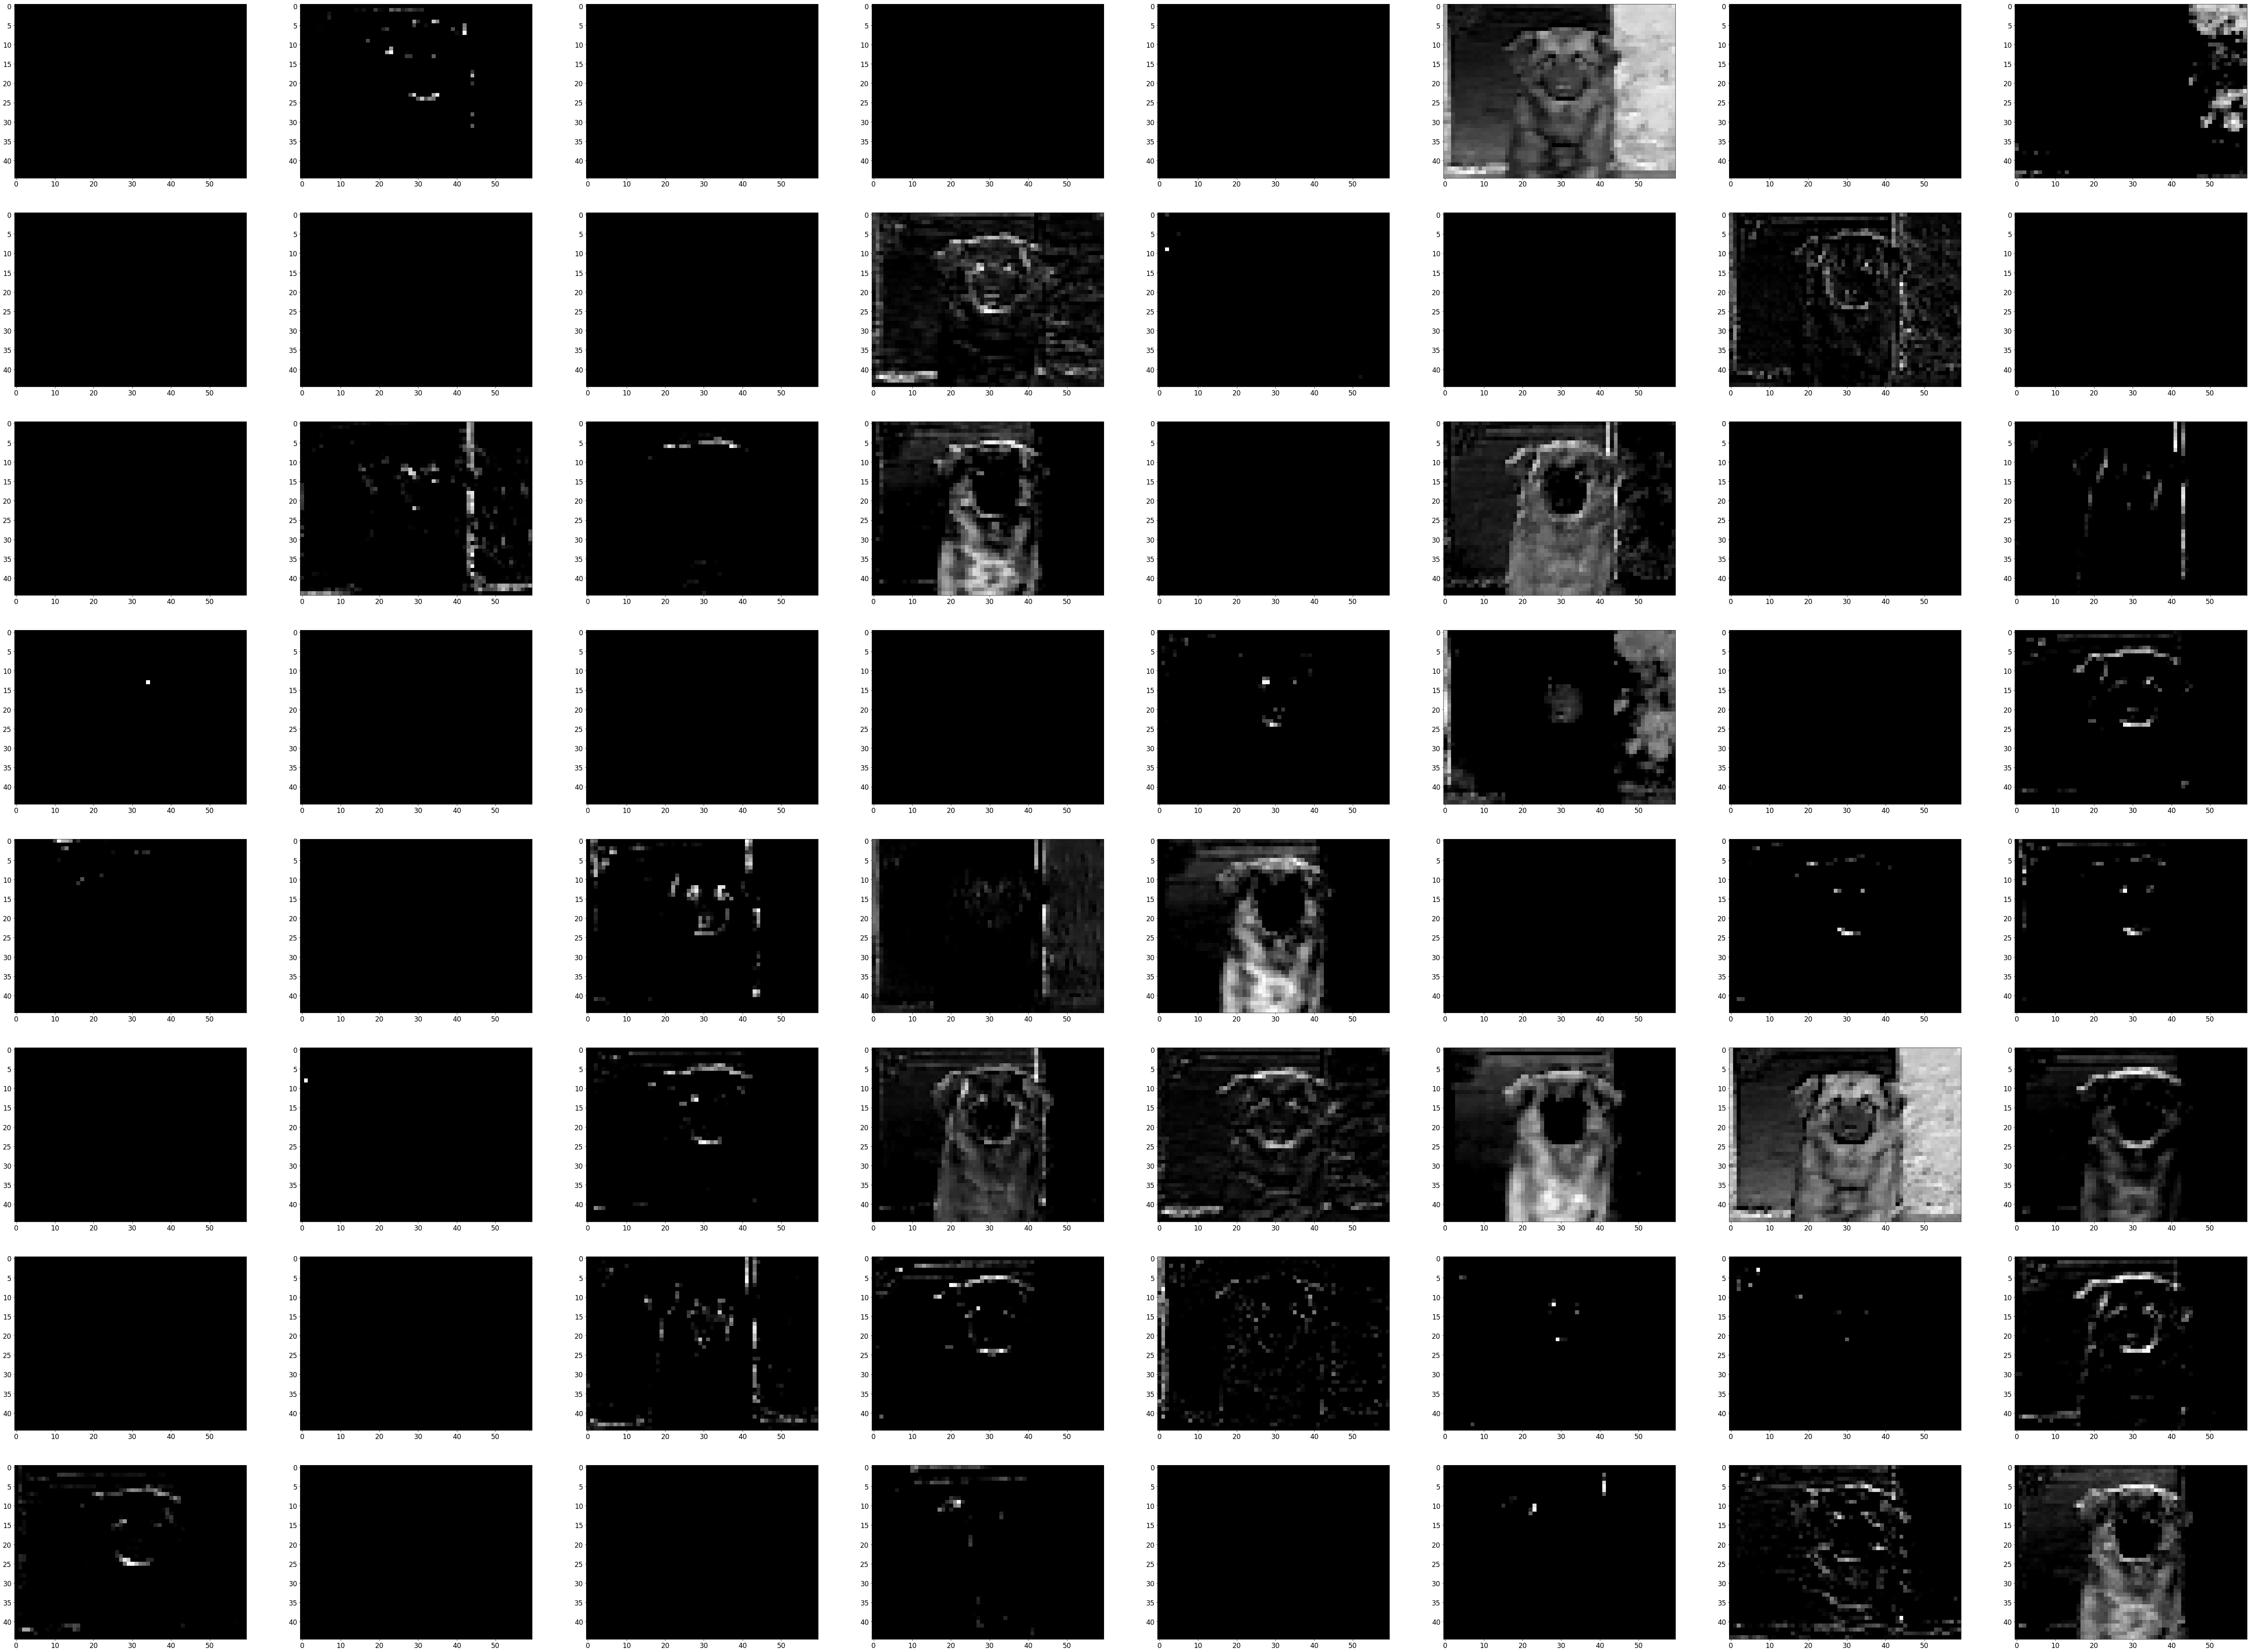

In [20]:
# feeding specific layer to the function to visualize the filters
show_filters(conv4)

### Helper Functions

###### a) a function to visualize the layers

In [2]:
def show_filters(layer):
    inp = [K.learning_phase()] + model.inputs
    _convout1_f = K.function(inp, [layer.output])
    def convout1_f(X):
        #to disable the training 
        return _convout1_f([0] + [X])

    convs = np.squeeze(convout1_f(prepared_img))
    n = int(np.ceil(np.sqrt(convs.shape[0])))
    
    # plotting each filter
    fig = plt.figure(figsize=(100,75))
    for i in range(len(convs)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convs[i], cmap='gray')
    plt.show()

##### b) a function to expand the dimension of an array since Keras needs a 4d Tensor

In [3]:
def prepare_tensor(image):
    raw = np.copy(image).astype('uint8')
    #swapping axes
    image = np.swapaxes(np.swapaxes(image, 1, 2), 0, 1)
    #RGB to BGR
    image = image[::-1, :, :]
    return floatX(image[np.newaxis])